<a href="https://colab.research.google.com/github/biraj21/deep_learning_with_tf/blob/main/ch4/newswires_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters

In [2]:
def vectorize_sequences(sequences, dims=10_000):
    result = np.zeros((len(sequences), dims))
    for i, sequence in enumerate(sequences):
        for word_index in sequence:
            result[i, word_index] = 1

    return result

In [3]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10_000)
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

In [4]:
# setting aside 1000 training samples for model validation
X_val = X_train[:1000]
y_val = y_train[:1000]

partial_X_train = X_train[1000:]
partial_y_train = y_train[1000:]

In [5]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax"),
])

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    partial_X_train, 
    partial_y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=256
)

epochs_range = range(1, 21)
df_history = pd.DataFrame(history.history, index=epochs_range)

Epoch 1/20
32/32 [==============================] - 4s 92ms/step - loss: 1.9932 - accuracy: 0.6113 - val_loss: 1.3142 - val_accuracy: 0.7110
Epoch 2/20
32/32 [==============================] - 3s 81ms/step - loss: 0.9766 - accuracy: 0.7878 - val_loss: 1.0535 - val_accuracy: 0.7740
Epoch 3/20
32/32 [==============================] - 3s 85ms/step - loss: 0.6429 - accuracy: 0.8647 - val_loss: 1.0279 - val_accuracy: 0.7700
Epoch 4/20
32/32 [==============================] - 2s 52ms/step - loss: 0.4435 - accuracy: 0.9050 - val_loss: 0.9286 - val_accuracy: 0.8030
Epoch 5/20
32/32 [==============================] - 1s 46ms/step - loss: 0.3168 - accuracy: 0.9330 - val_loss: 0.9404 - val_accuracy: 0.7980
Epoch 6/20
32/32 [==============================] - 1s 45ms/step - loss: 0.2486 - accuracy: 0.9442 - val_loss: 0.9084 - val_accuracy: 0.8110
Epoch 7/20
32/32 [==============================] - 1s 45ms/step - loss: 0.2071 - accuracy: 0.9471 - val_loss: 0.9729 - val_accuracy: 0.8080
Epoch 8/20
32

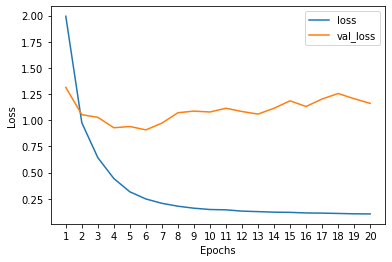

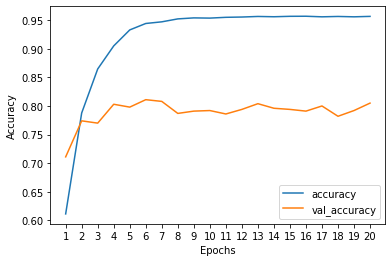

In [6]:
df_history.loc[:, ["loss","val_loss"]].plot(
    xticks=epochs_range,
    xlabel="Epochs",
    ylabel="Loss"
)
df_history.loc[:, ["accuracy", "val_accuracy"]].plot(
    xticks=epochs_range,
    xlabel="Epochs",
    ylabel="Accuracy"
)

In [7]:
df_history.head(10)

,loss,accuracy,val_loss,val_accuracy
1,1.993230,0.611250,1.314171,0.711
2,0.976648,0.787772,1.053497,0.774
3,0.642879,0.864696,1.027901,0.770
4,0.443486,0.905036,0.928642,0.803
5,0.316806,0.932974,0.940443,0.798
6,0.248569,0.944250,0.908367,0.811
7,0.207057,0.947131,0.972892,0.808
8,0.179479,0.952268,1.072234,0.787
9,0.160356,0.954022,1.087332,0.791
10,0.147912,0.953646,1.079068,0.792


# Final Training
Now training the model on all training data.

In [8]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax"),
])

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=6,
    batch_size=256
)

Epoch 1/6
36/36 [==============================] - 2s 50ms/step - loss: 1.8372 - accuracy: 0.6235 - val_loss: 1.0209 - val_accuracy: 0.7630
Epoch 2/6
36/36 [==============================] - 2s 44ms/step - loss: 0.9089 - accuracy: 0.8084 - val_loss: 0.6198 - val_accuracy: 0.8650
Epoch 3/6
36/36 [==============================] - 2s 45ms/step - loss: 0.5828 - accuracy: 0.8786 - val_loss: 0.4169 - val_accuracy: 0.9050
Epoch 4/6
36/36 [==============================] - 2s 45ms/step - loss: 0.3977 - accuracy: 0.9164 - val_loss: 0.3215 - val_accuracy: 0.9280
Epoch 5/6
36/36 [==============================] - 2s 43ms/step - loss: 0.2969 - accuracy: 0.9336 - val_loss: 0.2136 - val_accuracy: 0.9540
Epoch 6/6
36/36 [==============================] - 2s 43ms/step - loss: 0.2326 - accuracy: 0.9447 - val_loss: 0.1801 - val_accuracy: 0.9640


In [9]:
model.evaluate(X_test, y_test)

71/71 [==============================] - 0s 5ms/step - loss: 1.0358 - accuracy: 0.7947


[1.0357786417007446, 0.7947462201118469]